<a href="https://colab.research.google.com/github/Keerys/MVP-Analise-de-dados-e-boas-praticas/blob/main/MVP_Analise_de_dados_e_boas_praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Definição do problema



Neste projeto será usado o dataset Loan-Approval-Prediction-Dataset, obtido no Kaggle. Tem como objetivo prever se o cliente está apto ou nao para realizar um empréstimo no banco, a partir de dados bancários e financeiros, sendo um problema de aprendizado supervisionado. O dataset possui diversos atributos relacionados a dados financeiros do cliente e possui 3 variáveis de classes binárias (com 1 delas sendo o status se foi ou não aprovado).

Com o desenvolvimento do projeto, pretendo analisar e verificar se as seguintes premissas sao verdadeiras:


1.   Se os atributos 'loan_amount' e 'income_annum' possuem um peso maior para a decisao.
2.   Se a maior parte de pedidos de empréstimo são de clientes desempregados no momento.
3.   Se a maior parte de pedidos de empréstimo são de cliente que não possuem diploma de Ensino Superior.


**Informações sobre os atributos**


1. loan_id - Número de identificação
2. no_of_dependents - Número de dependentes
3. education - Nível de Educação, se possui ou não diploma de ensino superior
4. self_employed - Indica se o trabalho é autônomo ou não
5. income_annum - Renda anual
6. loan_amount - Valor do empréstimo
7. loan_term - Prazo do empréstimo em anos
8. cibil_score - Pontuação de Crédito
9. residential_assets_value - Valor dos ativos residenciais
10. commercial_assets_value - Valor dos ativos comerciais
11.  luxury_assets_value - Valor dos ativos de luxo
12.  bank_asset_value - Valor dos ativos bancários
13. loan_status - Status do empréstimo



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns

# 2.Carga de dados

Carregar o arquivo .csv usando a biblioteca Pandas do Python

In [2]:
url = 'https://raw.githubusercontent.com/Keerys/MVP-Analise-de-dados-e-boas-praticas/refs/heads/main/loan_approval_dataset.csv'

dataset = pd.read_csv(url, delimiter=',')

dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Verificando o nome das colunas do dataset, constatei que existem espaços vazios antes dos nomes de algumas colunas. Esses espaços serão removidos para evitar problemas posteriores no código e para melhorar a visualização.

In [3]:
dataset.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [4]:
# Removendo o espaço vazio nos nomes das colunas

dataset.columns = dataset.columns.str.strip()

dataset.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

# 3.Análise de dados

## 3.1. Estatísticas Descritivas

Nessa estapa vou verificar as dimensões do dataset, como a contagem dos atributos e estâncias, os tipos de dados dos atributos e fazer um resumo estatístico.

In [5]:
# Dimensões do dataset
dataset.shape

(4269, 13)

Tipo de Dados dos Atributos

In [6]:
# Informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


Analisando os tipos de dados foi verificados que as colunas 'education', 'self_employed' e 'loan_status' não estão no formato Int que é o desejado, sendo necessário mudar o seu tipo. Também é necessário mudar os valores de classe das colunas citadas para números para, em seguida, exibir o resumo estatístico do dataset

In [7]:
# Trocar o valores de classe por números da coluna 'education' e converter o tipo para Int.
escolaridade = {' Not Graduate': 0, ' Graduate': 1}

dataset['education'] = dataset['education'].map(escolaridade).fillna(dataset['education'])

dataset['education'] = dataset['education'].astype(int)

In [8]:
# Trocar o valores de classe por números da coluna 'self_employed' e converter o tipo para Int.
emprego = {' No': 0, ' Yes': 1}

dataset['self_employed'] = dataset['self_employed'].map(emprego).fillna(dataset['self_employed'])

dataset['self_employed'] = dataset['self_employed'].astype(int)

In [9]:
# Trocar o valores de classe por números da coluna 'loan_status' e converter o tipo para Int.
status = {' Rejected': 0, ' Approved': 1}

dataset['loan_status'] = dataset['loan_status'].map(status).fillna(dataset['loan_status'])

dataset['loan_status'] = dataset['loan_status'].astype(int)

In [10]:
# Verificando se a mudança de tipo foi feita corretamente
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   loan_id                   4269 non-null   int64
 1   no_of_dependents          4269 non-null   int64
 2   education                 4269 non-null   int64
 3   self_employed             4269 non-null   int64
 4   income_annum              4269 non-null   int64
 5   loan_amount               4269 non-null   int64
 6   loan_term                 4269 non-null   int64
 7   cibil_score               4269 non-null   int64
 8   residential_assets_value  4269 non-null   int64
 9   commercial_assets_value   4269 non-null   int64
 10  luxury_assets_value       4269 non-null   int64
 11  bank_asset_value          4269 non-null   int64
 12  loan_status               4269 non-null   int64
dtypes: int64(13)
memory usage: 433.7 KB


In [11]:
dataset.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


Uma vez que tenho a informação que no dataset não existe dados incorretos ou discrepantes, vou realizar uma procura por dados nulos para ver se existe algum valor que não consiga usar e comprometa a acurácia. Com a procura se pode perceber que náo existe missings nos dados.

In [12]:
# Verificar nulls no dataset
dataset.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


Ao analisar o resumo estatístico, puder destacar alguns pontos:

> O loan_status mostra que o dataset está desbalanceado

> Pelo menos 75% das pessoas pedindo empréstimo estão empregadas

> Pelo menos 75% das pessoas pedindo empréstimo são Graduadas

> A média de tempo para o pagamento do empréstimo é de 10.9 anos




In [13]:
# Resumo estatístico dos atributos
dataset.describe()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03,4269.000000
mean,2135.000000,2.498712,0.502225,0.503631,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06,0.622160
std,1232.498479,1.695910,0.500054,0.500045,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06,0.484904
min,1.000000,0.000000,0.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,1068.000000,1.000000,0.000000,0.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,2135.000000,3.000000,1.000000,1.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06,1.000000
75%,3202.000000,4.000000,1.000000,1.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06,1.000000
max,4269.000000,5.000000,1.000000,1.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07,1.000000


Agora vou verificar se as classes do dataset estão balanceadas para que possamos tratá-las nas próximas estapas, se necessário. Analisando, vi que as classes 0 ('Rejected') e 1 ('Approved') não estão balanceadas, com uma ocorrência maior da classe 1 ('Approved'), sendo necessário fazer o balanceamento quando for tratar os dados

In [14]:
# Verifica a distribuição das classes
dataset.groupby('loan_status').size()

,0
loan_status,
0,1613
1,2656


In [15]:
### tentar faze grafico pizza!!!!!!!

quantidade = dataset.groupby('loan_status').size()
quantidade

,0
loan_status,
0,1613
1,2656


## 3.2.Análise dos Atributos a partir de Gráficos

Nessa etapa vou criar um histograma para cada atributo do dataset. É possível perceber que os atributos 'residential_assets_value' e 'commercial_assets_value' seguem uma distribuição exponencial, enquanto o restante segue uma distribuição não gaussiana.

Percebe-se que os atributos 'Education' e 'Self_employed' estão bem balanceados,
enquanto 'loan_status' está desbalanceado, sendo necessário fazer o balanceamento de classes.

Existem poucas pessoas com um valor de ativos comercial e residencial altos e **a maioria dos empréstimos possuem valores altos. VERIFICAR SE ESTA CORRETO ESSA INFORMAÇÂO**

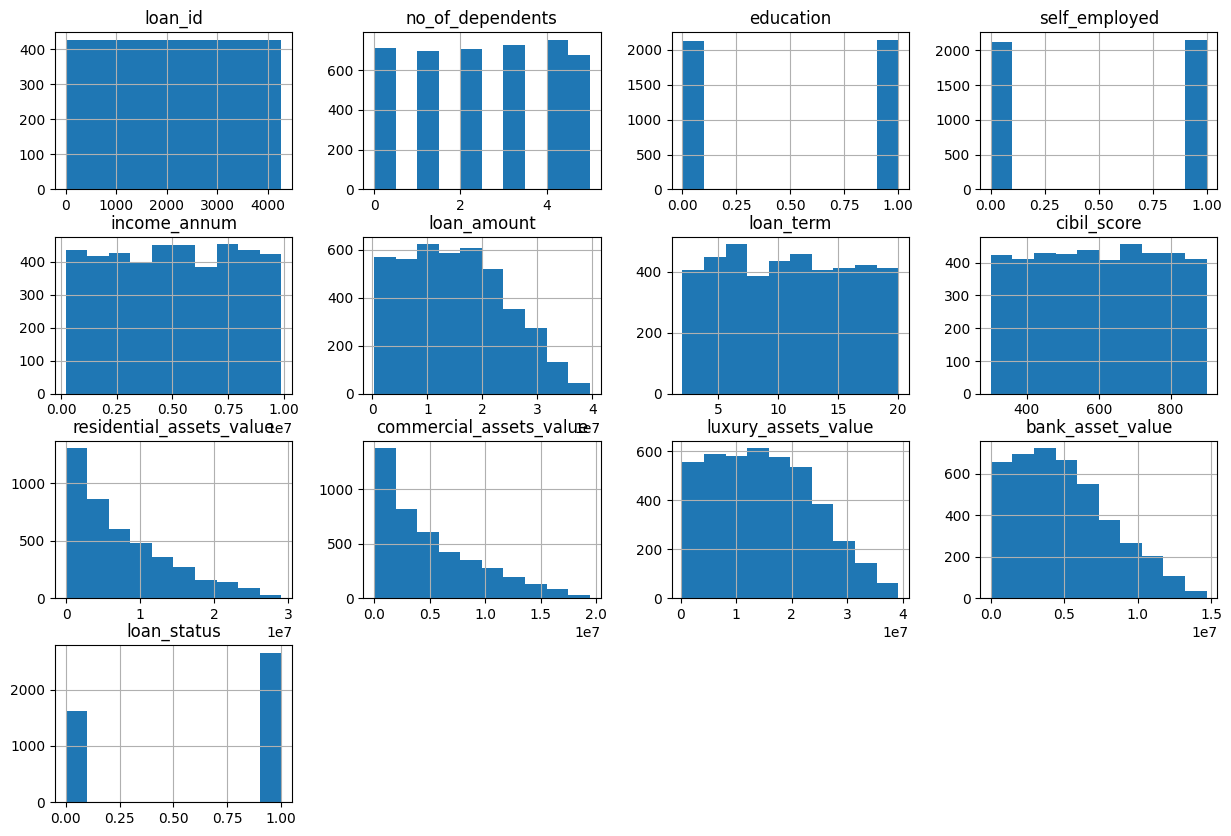

In [16]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

Criando um Gráfico de Densidade se torna mais fácil a visualização da distribuição dos atributos e com a análise, vemos de forma facilitada a confirmação dos tipos de distribuição analisada nos histogramas.

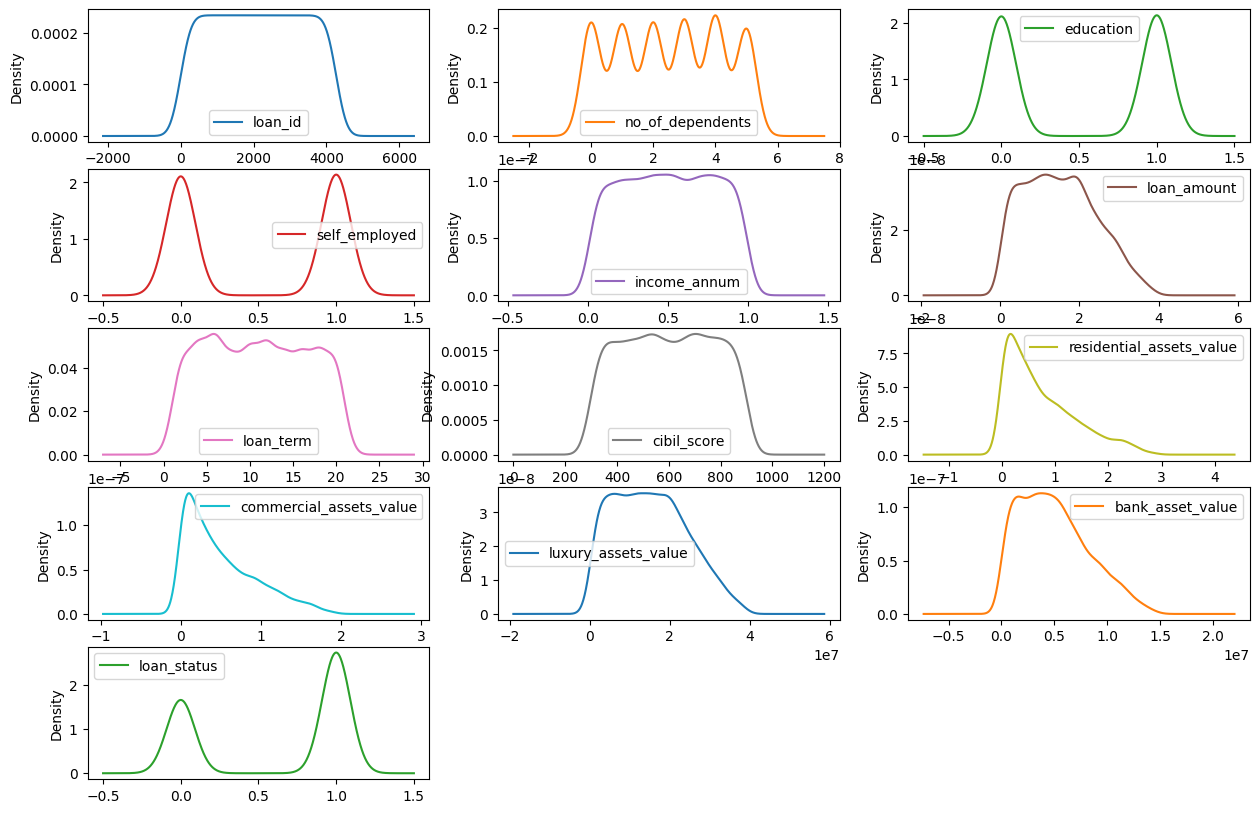

In [17]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (5,3), sharex = False, figsize = (15,10))
plt.show()

Em seguida vou criar um  gráfico Boxplot, para verificar a dispersão do dataset e se existem possíveis outliers.

É possível verificar que existem outliers com valores altos nos atributos 'income_annum', 'loan_amount' e 'cibil_score', contudo como sao atributos que permitem existir valores altos, eles nao precisam ser excluídos do dataset para ter uma boa acurácia no treinamento do modelo. Outro ponto notado foi que a dispersão dos atributos é bem distinta entre eles.

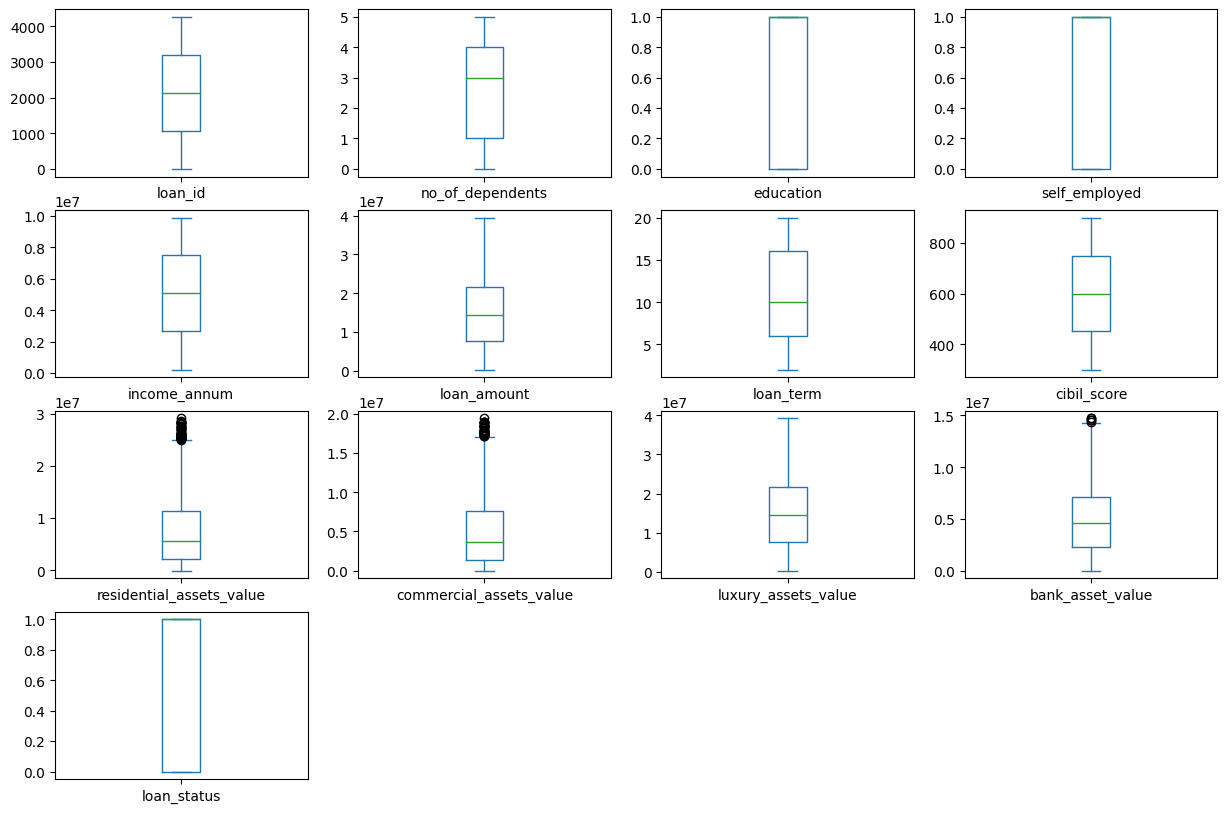

In [18]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False, figsize = (15,10))
plt.show()

O próximo passo é usar a matriz de correlações para visualizar graficamente a correlação entre os atributos.

Há uma alta correlação entre os atributos 'income_annum', 'loan_amount', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value' e 'bank_assets_value'. Um ponto curioso é que o 'loan_status' está mais correlacionado somente com 'cibil_score'.

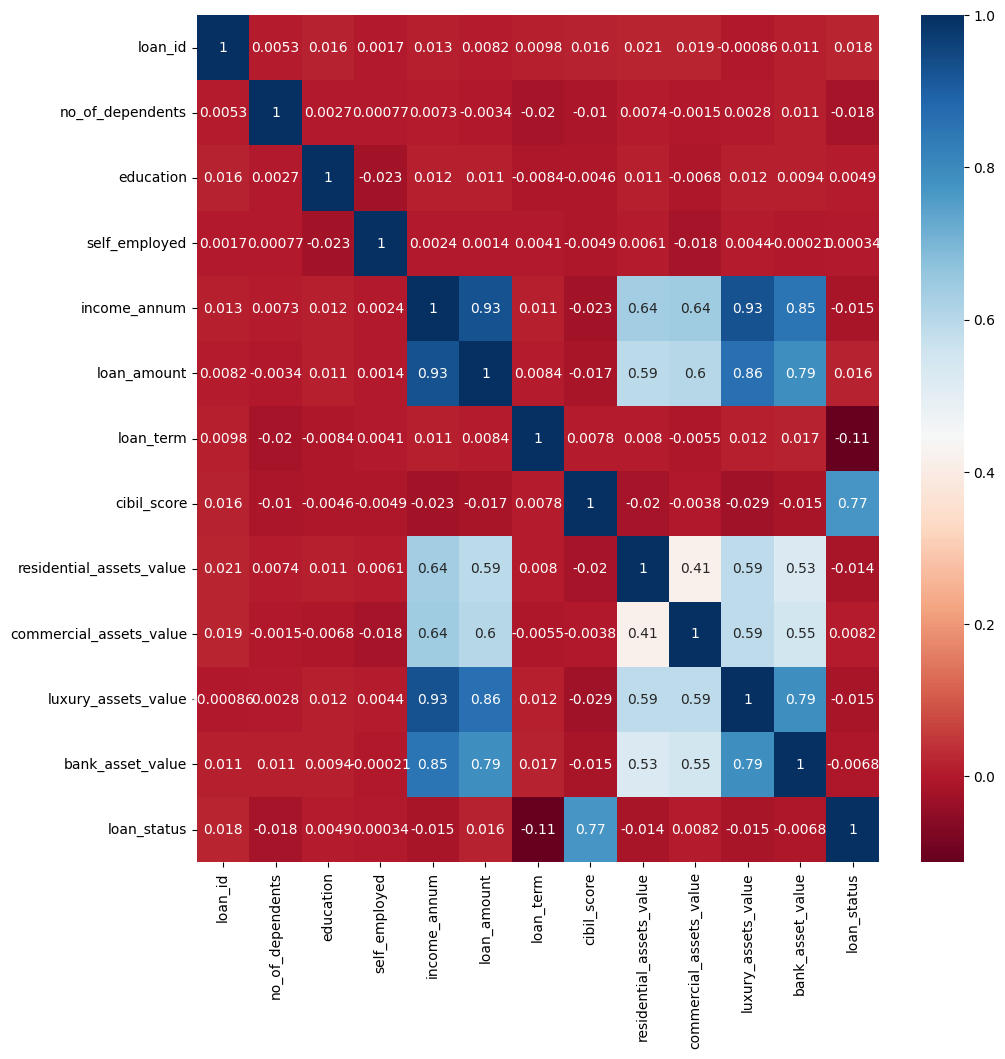

In [19]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(11,11))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

# 4.Pré-Processamento de dados

## 4.1 Limpeza e tratamento

Conforme analisado no item 3.1, não existe a necessidade de tratar nem limpar os dados, uma vez que não temos missing e os valores no dataset estão corretos e sem discrepâncias.


## 4.2.Tratamento dos dados

Nessa etapa vou remover o atributo 'loan_id' por nao ser relevante para o treinamento do modelo, uma vez que ele se refere a uma ordem dos dados de quando o banco de dados foi criado, e essa ordem nao é necessária nem relevante para a criação de um modelo. Em seguida vou realizar a normalização dos dados, tendo em vista que vimos que os atributos de um modo geral seguem uma distribuição não gaussiana.

In [20]:
# Remover a coluna 'loan_id'
dataset.drop(['loan_id'], axis=1, inplace=True)

In [21]:
dataset.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [22]:
# Normalização do dataset

scaler = MinMaxScaler()

dataset_norm = scaler.fit_transform(dataset)
print(dataset_norm)

[[0.4        1.         0.         ... 0.57583548 0.54421769 1.        ]
 [0.         0.         1.         ... 0.218509   0.2244898  0.        ]
 [0.6        1.         0.         ... 0.84832905 0.8707483  0.        ]
 ...
 [0.4        0.         0.         ... 0.45758355 0.49659864 0.        ]
 [0.2        0.         0.         ... 0.35475578 0.39455782 1.        ]
 [0.2        1.         0.         ... 0.91002571 0.81632653 1.        ]]


## 4.3.Separação em conjunto de treino e conjunto de teste

In [23]:
# Separação em conjuntos de treino e teste com dataset original
test_size = 0.20
seed = 7

array = dataset.values
X = array[:,0:11]
y = array[:,11]


X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

In [24]:
# Separação em conjuntos de treino e teste com dataset normalizado
test_size = 0.20
seed = 7

array = dataset_norm
X_norm = array[:,0:11]
y_norm = array[:,11]


X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y)

## 4.4.Balanceamento de classes dos dados

Realizar o balanceamento de classes do dataset através do oversampling,  para não perder informações importantes da classe majoritária 1 ('Approved') que podem vir a influenciar na predição. Como a base de dados não é muito grande, o aumento do custo computacional não é um problema.

In [25]:
# Balanceamento com SMOTE
smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
# Verificar o balanceamento feito no conjunto de treinamento
pd.Series(y_resampled).value_counts()

,count
1,2125
0,2125


## 5.Conclusão

Neste MVP foi possível verificar que nem todos os atributos possuem um grande peso para a decisão do problema. Nas premissas foi exposto que os atributos de maiores pesos eram 'loan_amount' e 'income_annum', contudo observando a matriz de correlações pude perceber que, curiosamente, o atributo com maior correlaçao com o target era 'cibil_score'.

Outros pontos respondidos com a analise dos dados foi o fato de que na maioria dos pedidos de empréstimo, os clientes são autônomos e possuem diploma de Ensino Superior. Sobre o diploma acho curioso esses dados, uma vez que na teoria um Ensino Superior traria melhores condições de trabalho e financeiras, contudo a maioria de pedidos de empréstimo foi feito por pessoas que possuem Ensino Superior.

A análise dos dados permite uma mellhor compreensão do dataset e do problema como um todo, ajudando a organizar e preparar os dados para o desenvolvimento de um modelo preditivo com maior precisão.

